In [3]:
import random
import numpy as np

def sigma(z):
    return 0.5*(np.tanh(0.5*z)+1.)
def sigma_p(z):
    return sigma(z)*(1.-sigma(z))

class neurons(object):
    def __init__(self, shape):
        self.shape = shape
        self.v = [np.zeros((n,1)) for n in shape]
        self.z = [np.zeros((n,1)) for n in shape[1:]]
        self.w = [np.random.randn(n,m) for n,m in zip(shape[1:],shape[:-1])]
        self.b = [np.random.randn(n,1) for n in shape[1:]]
        self.delw = [np.zeros(w.shape) for w in self.w]
        self.delb = [np.zeros(b.shape) for b in self.b]

    def predict(self, x):
        self.v[0] = x.reshape(self.v[0].shape)
        for l in range(len(self.shape)-1):
            self.z[l] = np.dot(self.w[l],self.v[l])+self.b[l]
            self.v[l+1] = sigma(self.z[l])
        return self.v[-1]

    def gradient(self, y):
        for l in range(len(self.shape)-2,-1,-1):
            if l==len(self.shape)-2:
                  delta = (self.v[-1]-y.reshape(self.v[-1].shape))*sigma_p(self.z[l])
            else: delta = np.dot(self.w[l+1].T,self.delb[l+1])*sigma_p(self.z[l])
            self.delb[l] = delta
            self.delw[l] = np.dot(delta,self.v[l].T)

    def fit(self, x_data, y_data, epochs, batch_size, eta):
        samples = list(zip(x_data, y_data))
        for ep in range(epochs):
            print('Epoch: %d/%d' % (ep+1,epochs))
            random.shuffle(samples)
            sum_delw = [np.zeros(w.shape) for w in self.w]
            sum_delb = [np.zeros(b.shape) for b in self.b]
            batch_count = 0
            for x,y in samples:
                self.predict(x)
                self.gradient(y)
                for l in range(len(self.shape)-1):
                    sum_delw[l] += self.delw[l]
                    sum_delb[l] += self.delb[l]
                batch_count += 1
                if batch_count>=batch_size or (x is samples[-1][0]):
                    for l in range(len(self.shape)-1):
                        self.w[l] -= eta/batch_count*sum_delw[l]
                        self.b[l] -= eta/batch_count*sum_delb[l]
                        sum_delw[l],sum_delb[l] = 0.,0.
                    batch_count = 0
            ret = self.evaluate(x_data, y_data)
            print('Loss: %.4f, Acc: %.4f' % ret)

    def evaluate(self, x_data, y_data):
        loss, cnt = 0., 0.
        for x,y in zip(x_data, y_data):
            self.predict(x)
            loss += ((self.v[-1]-y.reshape(self.v[-1].shape))**2).sum()
            if np.argmax(self.v[-1])==np.argmax(y): cnt += 1.
        loss /= 2.*len(x_data)
        return loss, cnt/len(x_data)


In [40]:
shape=np.array([2,5,2])
v = [np.zeros((n,1)) for n in shape]

In [39]:
v

[array([2, 5]), array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]), array([[0.],
        [0.]])]

In [15]:
x=np.array([2,5])

In [17]:
x

array([2, 5])

In [41]:
v[0] = x.reshape(v[0].shape)

In [47]:
for l in range(3-1):
    print(l)

0
1


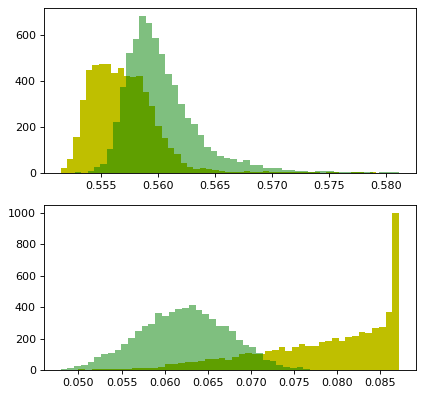

In [6]:
import numpy as np
import matplotlib.pyplot as plt

mnist = np.load('mnist.npz')
x_train = mnist['x_train'][mnist['y_train']<=1]/255.
y_train = mnist['y_train'][mnist['y_train']<=1]

x_train = np.array([[img.mean(),img[10:18,11:17].mean()] for img in x_train])
y_train = np.array([[[1,0],[0,1]][n] for n in y_train])

# from neurons import neurons
model = neurons([2,5,2])
out = np.array([model.predict(x) for x in x_train])

fig = plt.figure(figsize=(6,6), dpi=80)
plt.subplot(2,1,1)
plt.hist(out[:,0][y_train[:,0]==1], bins=50, color='y')
plt.hist(out[:,0][y_train[:,1]==1], bins=50, color='g', alpha=0.5)
plt.subplot(2,1,2)
plt.hist(out[:,1][y_train[:,0]==1], bins=50, color='y')
plt.hist(out[:,1][y_train[:,1]==1], bins=50, color='g', alpha=0.5)
plt.show()

In [50]:
for z in 
    sigma(z)*(1.-sigma(z))

0.19661193324148185

In [78]:
c=np.zeros(100)
for j in range(0,100):
    c[j] = sigma(j-50)

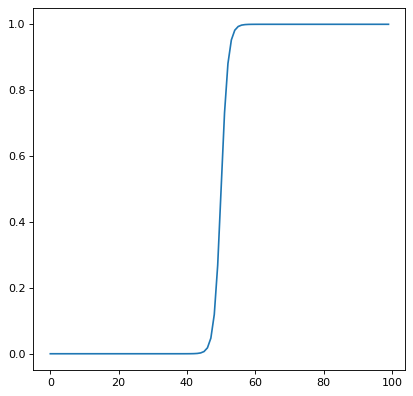

In [79]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6), dpi=80)
plt.plot(c)


In [84]:
np.array([[[1,0],[0,1]][1]])

array([[0, 1]])

Optimization terminated successfully.
         Current function value: 0.005192
         Iterations: 178
         Function evaluations: 6061
         Gradient evaluations: 209
Performance (training): 0.9936044216344255


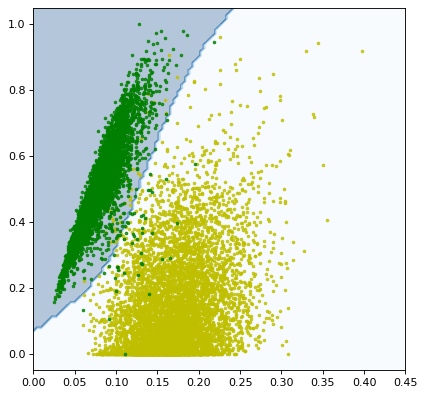

In [8]:
import numpy as np
import matplotlib.pyplot as plt

mnist = np.load('mnist.npz')
x_train = mnist['x_train'][mnist['y_train']<=1]/255.
y_train = mnist['y_train'][mnist['y_train']<=1]

x_train = np.array([[img.mean(),img[10:18,11:17].mean()] for img in x_train])
y_train = np.array([[[1,0],[0,1]][n] for n in y_train])

# from neurons import neurons
model = neurons([2,5,2])

import scipy.optimize as opt
def f(x):
    model.w[0] = x[:10].reshape(model.w[0].shape)
    model.w[1] = x[10:20].reshape(model.w[1].shape)
    model.b[0] = x[20:25].reshape(model.b[0].shape)
    model.b[1] = x[25:].reshape(model.b[1].shape)
    y = np.array([model.predict(x) for x in x_train]) #每一個data都有兩個outputs
    return ((y[:,:,0]-y_train)**2).sum()/len(x_train)/ 2.
x_init = np.random.randn(27)
res = opt.minimize(f,x_init,options={'disp': True})

out = np.array([model.predict(x) for x in x_train])
s_train = (np.argmax(out[:,:,0],axis=1)==np.argmax(y_train,axis=1)).sum()/len(y_train)
print('Performance (training):', s_train)

fig = plt.figure(figsize=(6,6), dpi=80)
xv, yv = np.meshgrid(np.linspace(0.,0.45,100),np.linspace(-0.05,1.05,100))
zv = np.array([np.argmax(model.predict(x)) for x in np.c_[xv.ravel(), yv.ravel()]])
plt.contourf(xv, yv, zv.reshape(xv.shape), alpha=.3, cmap='Blues')
plt.scatter(x_train[:,0][y_train[:,0]==1], x_train[:,1][y_train[:,0]==1], c = 'y', s=5, alpha=0.8)
plt.scatter(x_train[:,0][y_train[:,1]==1], x_train[:,1][y_train[:,1]==1], c = 'g', s=5, alpha=0.8)
plt.show()

In [100]:
model = neurons([2,5,2])
x_train = mnist['x_train'][mnist['y_train']<=1]/255.
x_train = np.array([[img.mean(),img[10:18,11:17].mean()] for img in x_train])

y = np.array([model.predict(x) for x in x_train]) 

In [122]:
y[:,:,0]

array([[0.81006815, 0.49392312],
       [0.81358053, 0.52416461],
       [0.81381736, 0.53205246],
       ...,
       [0.81358437, 0.5191007 ],
       [0.81001282, 0.49899262],
       [0.81361894, 0.50912189]])

Optimization terminated successfully.
         Current function value: 0.000065
         Iterations: 891
         Function evaluations: 32538
         Gradient evaluations: 986


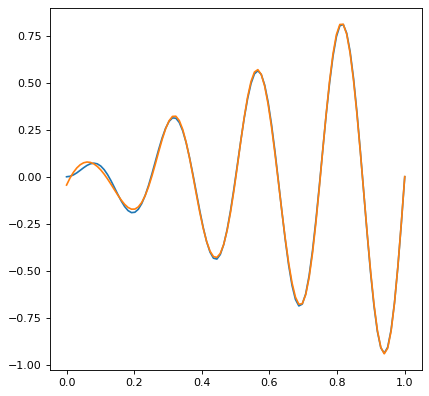

In [126]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.linspace(0.,1.,100)
y_train = [x*np.sin(x*np.pi*8.) for x in x_train]

# from neurons import neurons
model = neurons([1,10,1])

import scipy.optimize as opt
def f(x):
    model.w[0][:] = x[:10].reshape(model.w[0].shape)
    model.w[1][:] = x[10:20].reshape(model.w[1].shape)
    model.b[0][:] = x[20:30].reshape(model.b[0].shape)
    model.b[1][:] = x[30].reshape(model.b[1].shape)
    y = []
    for x in x_train:
        model.predict(x)
        y.append(model.z[-1][0,0])
    y = np.array(y)
    return ((y-y_train)**2).sum()/len(x_train)/2.
x_init = np.random.randn(31)
res = opt.minimize(f,x_init,options={'disp': True})

out = []
for x in x_train:
    model.predict(x)
    out.append(model.z[-1][0,0])
fig = plt.figure(figsize=(6,6), dpi=80)
plt.plot(x_train, y_train)
plt.plot(x_train, out)
plt.show()

In [127]:
x_train

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [137]:
model.z[-1]

array([[0.00103502]])

In [166]:
import random
import numpy as np
import scipy.optimize as opt

def sigma(z):
    return 0.5*(np.tanh(0.5*z)+1.)
def sigma_p(z):
    return sigma(z)*(1.-sigma(z))

class neurons(object):
    def __init__(self, shape):
        self.shape = shape
        self.v = [np.zeros((n,1)) for n in shape]
        self.z = [np.zeros((n,1)) for n in shape[1:]]
        self.w = [np.random.randn(n,m) for n,m in zip(shape[1:],shape[:-1])]
        self.b = [np.random.randn(n,1) for n in shape[1:]]
        self.delw = [np.zeros(w.shape) for w in self.w]
        self.delb = [np.zeros(b.shape) for b in self.b]

    def predict(self, x):
        self.v[0] = x.reshape(self.v[0].shape)
        for l in range(len(self.shape)-1):
            self.z[l] = np.dot(self.w[l],self.v[l])+self.b[l]
            self.v[l+1] = sigma(self.z[l])
        return self.v[-1]


def calc_fully_connected_NN(x_data, W, B):
    y_predict = np.zeros(100)
    ### START YOUR CODE HERE ###
    model = neurons([4,8,8,1])
    

#     def f(x):
#         model.w[0] = x[:32].reshape(model.w[0].shape)
#         model.w[1] = x[32:96].reshape(model.w[1].shape)
#         model.w[2] = x[96:104].reshape(model.w[2].shape)
#         model.b[0] = x[104:112].reshape(model.b[0].shape)
#         model.b[1] = x[112:120].reshape(model.b[1].shape)
#         model.b[2] = x[120:].reshape(model.b[2].shape)
#         y = np.array([model.predict(x) for x in x_data])
#         return ((y[:,:,0]-y_train)**2).sum()/len(x_train)/ 2.
        
#     x_init = np.random.randn(121)
    
    
    
    x=np.zeros(121)
    x[0:104] = np.array([W]*104)
    x[104:121] = np.array([B]*17)

    model.w[0] = x[:32].reshape(model.w[0].shape)
    model.w[1] = x[32:96].reshape(model.w[1].shape)
    model.w[2] = x[96:104].reshape(model.w[2].shape)
    model.b[0] = x[104:112].reshape(model.b[0].shape)
    model.b[1] = x[112:120].reshape(model.b[1].shape)
    model.b[2] = x[120:].reshape(model.b[2].shape)
    
    y_predict = np.array([model.predict(x) for x in x_data])[:,0,0]

    #### END YOUR CODE HERE ####
    return y_predict


In [ ]:




res = opt.minimize(f,x_init,options={'disp': True})

out = np.array([model.predict(x) for x in x_train])
s_train = (np.argmax(out[:,:,0],axis=1)==np.argmax(y_train,axis=1)).sum()/len(y_train)
print('Performance (training):', s_train)

fig = plt.figure(figsize=(6,6), dpi=80)
xv, yv = np.meshgrid(np.linspace(0.,0.45,100),np.linspace(-0.05,1.05,100))
zv = np.array([np.argmax(model.predict(x)) for x in np.c_[xv.ravel(), yv.ravel()]])
plt.contourf(xv, yv, zv.reshape(xv.shape), alpha=.3, cmap='Blues')
plt.scatter(x_train[:,0][y_train[:,0]==1], x_train[:,1][y_train[:,0]==1], c = 'y', s=5, alpha=0.8)
plt.scatter(x_train[:,0][y_train[:,1]==1], x_train[:,1][y_train[:,1]==1], c = 'g', s=5, alpha=0.8)
plt.show()

In [182]:
 np.array([model.predict(x) for x in x_train])[:,0,0]

array([0.48897835, 0.49825806, 0.50584954, 0.51175714, 0.51599695,
       0.51859722, 0.51960003, 0.51906403, 0.51706841, 0.51371786,
       0.50914832, 0.50353308, 0.49708869, 0.49007978, 0.48282193,
       0.47568152, 0.46907155, 0.46344239, 0.45926673, 0.45701767,
       0.45713885, 0.46000533, 0.46587433, 0.47482647, 0.48670282,
       0.50104952, 0.51708865, 0.53373614, 0.54967876, 0.56350369,
       0.5738536 , 0.57957358, 0.57982784, 0.57418516, 0.56268422,
       0.54588053, 0.52485334, 0.50113412, 0.47653463, 0.45290192,
       0.4318776 , 0.4147462 , 0.40241264, 0.39548445, 0.39439212,
       0.39947411, 0.41097231, 0.42891635, 0.45291638, 0.4819371 ,
       0.51417517, 0.54716303, 0.57812579, 0.60446038, 0.62412054,
       0.63576679, 0.63870532, 0.63274691, 0.61811233, 0.59543829,
       0.56585715, 0.53106776, 0.49330141, 0.45513169, 0.41916521,
       0.38772793, 0.36266862, 0.34533293, 0.33667163, 0.33738994,
       0.34803196, 0.36891085, 0.3998371 , 0.4396933 , 0.48606

In [ ]:
import numpy as np

def sigma(z):
    return 0.5*(np.tanh(0.5*z)+1.)
def sigma_p(z):
    return sigma(z)*(1.-sigma(z))

class neurons(object):
    def __init__(self, shape):
        self.shape = shape
        self.v = [np.zeros((n,1)) for n in shape]
        self.z = [np.zeros((n,1)) for n in shape[1:]]
        self.w = [np.random.randn(n,m) for n,m in zip(shape[1:],shape[:-1])]
        self.b = [np.random.randn(n,1) for n in shape[1:]]
        self.delw = [np.zeros(w.shape) for w in self.w]
        self.delb = [np.zeros(b.shape) for b in self.b]

    def predict(self, x):
        self.v[0] = x.reshape(self.v[0].shape)
        for l in range(len(self.shape)-1):
            self.z[l] = np.dot(self.w[l],self.v[l])+self.b[l]
            self.v[l+1] = sigma(self.z[l])
        return self.v[-1]


def calc_fully_connected_NN(x_data, y_data):
    loss = np.zeros(201)
    ### START YOUR CODE HERE ###
    model = neurons([1,8,1,8,1])
    W=1.0
    B=0.0

    x=np.zeros(121)
    x[0:104] = np.array([W]*104)
    x[104:121] = np.array([B]*17)

    model.w[0] = x[:8].reshape(model.w[0].shape)
    model.w[1] = x[:8].reshape(model.w[1].shape)
    model.w[2] = x[:8].reshape(model.w[2].shape)
    model.w[3] = x[:8].reshape(model.w[3].shape)
    
    model.b[0] = x[104:112].reshape(model.b[0].shape)

    model.b[2] = x[104:112].reshape(model.b[2].shape)
    model.b[3] = x[104:105].reshape(model.b[3].shape)
    
    
    bias=np.linspace(-10,10,201)
    for i,j in enumerate(bias):
        
        model.b[1] = j
        y = np.array([model.predict(x) for x in x_data])        
        loss[i]=((y[:,:,0]-y_data)**2).sum()/len(x_data)**2/ 2.
    
    
#     y_predict = np.array([model.predict(x) for x in x_data])[:,0,0]

   
    #### END YOUR CODE HERE ####
    return loss


In [187]:
model.b[1]

10

In [218]:
bias=np.linspace(-10,10,201)
for i,j in enumerate(bias):
    OOO[i]=10

NameError: name 'OOO' is not defined

In [219]:
C

200

In [183]:
#HW1

In [ ]:
import random
import numpy as np
import scipy.optimize as opt

def sigma(z):
    return 0.5*(np.tanh(0.5*z)+1.)
def sigma_p(z):
    return sigma(z)*(1.-sigma(z))

class neurons(object):
    def __init__(self, shape):
        self.shape = shape
        self.v = [np.zeros((n,1)) for n in shape]
        self.z = [np.zeros((n,1)) for n in shape[1:]]
        self.w = [np.random.randn(n,m) for n,m in zip(shape[1:],shape[:-1])]
        self.b = [np.random.randn(n,1) for n in shape[1:]]
        self.delw = [np.zeros(w.shape) for w in self.w]
        self.delb = [np.zeros(b.shape) for b in self.b]

    def predict(self, x):
        self.v[0] = x.reshape(self.v[0].shape)
        for l in range(len(self.shape)-1):
            self.z[l] = np.dot(self.w[l],self.v[l])+self.b[l]
            self.v[l+1] = sigma(self.z[l])
        return self.v[-1]


def calc_fully_connected_NN(x_data, W, B):
    y_predict = np.zeros(100)
    ### START YOUR CODE HERE ###
    model = neurons([4,8,8,1])
    

#     def f(x):
#         model.w[0] = x[:32].reshape(model.w[0].shape)
#         model.w[1] = x[32:96].reshape(model.w[1].shape)
#         model.w[2] = x[96:104].reshape(model.w[2].shape)
#         model.b[0] = x[104:112].reshape(model.b[0].shape)
#         model.b[1] = x[112:120].reshape(model.b[1].shape)
#         model.b[2] = x[120:].reshape(model.b[2].shape)
#         y = np.array([model.predict(x) for x in x_data])
#         return ((y[:,:,0]-y_train)**2).sum()/len(x_train)/ 2.
        
#     x_init = np.random.randn(121)
    
    
    
    x=np.zeros(121)
    x[0:104] = np.array([W]*104)
    x[104:121] = np.array([B]*17)

    model.w[0] = x[:32].reshape(model.w[0].shape)
    model.w[1] = x[32:96].reshape(model.w[1].shape)
    model.w[2] = x[96:104].reshape(model.w[2].shape)
    model.b[0] = x[104:112].reshape(model.b[0].shape)
    model.b[1] = x[112:120].reshape(model.b[1].shape)
    model.b[2] = x[120:].reshape(model.b[2].shape)
    
    y_predict = np.array([model.predict(x) for x in x_data])[:,0,0]

    #### END YOUR CODE HERE ####
    return y_predict


In [ ]:
#HW2

In [ ]:
import numpy as np

def sigma(z):
    return 0.5*(np.tanh(0.5*z)+1.)
def sigma_p(z):
    return sigma(z)*(1.-sigma(z))

class neurons(object):
    def __init__(self, shape):
        self.shape = shape
        self.v = [np.zeros((n,1)) for n in shape]
        self.z = [np.zeros((n,1)) for n in shape[1:]]
        self.w = [np.random.randn(n,m) for n,m in zip(shape[1:],shape[:-1])]
        self.b = [np.random.randn(n,1) for n in shape[1:]]
        self.delw = [np.zeros(w.shape) for w in self.w]
        self.delb = [np.zeros(b.shape) for b in self.b]

    def predict(self, x):
        self.v[0] = x.reshape(self.v[0].shape)
        for l in range(len(self.shape)-1):
            self.z[l] = np.dot(self.w[l],self.v[l])+self.b[l]
            self.v[l+1] = sigma(self.z[l])
        return self.v[-1]


def calc_fully_connected_NN(x_data, y_data):
    loss = np.zeros(201)
    ### START YOUR CODE HERE ###
    model = neurons([1,8,1,8,1])
    W=1.0
    B=0.0

    x=np.zeros(121)
    x[0:104] = np.array([W]*104)
    x[104:121] = np.array([B]*17)

    model.w[0] = x[:8].reshape(model.w[0].shape)
    model.w[1] = x[:8].reshape(model.w[1].shape)
    model.w[2] = x[:8].reshape(model.w[2].shape)
    model.w[3] = x[:8].reshape(model.w[3].shape)
    
    model.b[0] = x[104:112].reshape(model.b[0].shape)

    model.b[2] = x[104:112].reshape(model.b[2].shape)
    model.b[3] = x[104:105].reshape(model.b[3].shape)
    
    
    bias=np.linspace(-10,10,201)
    for i,j in enumerate(bias):
        
        model.b[1] = j
        y = np.array([model.predict(x) for x in x_data])        
        loss[i]=((y[:,:,0]-y_data)**2).sum()/len(x_data)**2/ 2.
    
    
#     y_predict = np.array([model.predict(x) for x in x_data])[:,0,0]

   
    #### END YOUR CODE HERE ####
    return loss
